<a href="https://colab.research.google.com/github/sebaspv/DogsVsCatsCNN/blob/master/DogsVsCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wFwkrRlYV_SrO9qhWcsIyF47m1hPMKmW4SLcfXEzJlQeryZPRKlQbw
Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/My Drive
import os
from matplotlib.image import imread
import numpy as np
import pandas as pd
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import cv2
from PIL import Image

image_shape = (100, 100, 3)
image_directory = '/content/gdrive/My Drive/'
test_images_path = image_directory + 'test/'
train_images_path = image_directory + 'train/'

image_gen = ImageDataGenerator(rotation_range=5, zoom_range=0.1, horizontal_flip=True, rescale=1 / 255)

# MODEL
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3),input_shape=image_shape, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# OUTPUT LAYER
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

train_image_gen = image_gen.flow_from_directory(train_images_path, target_size=image_shape[:2], color_mode='rgb',
                                                class_mode='binary'
                                                )
test_image_gen = image_gen.flow_from_directory(test_images_path, target_size=image_shape[:2], color_mode='rgb',
                                               class_mode='binary',
                                               shuffle=False
                                               )
early_stop = EarlyStopping(monitor='loss', patience=1)

model.fit(train_image_gen, epochs=15,callbacks=[early_stop])

# TEST PREPROCESSING
path = os.path.join(test_images_path)
# os.listdir(path)

X_test = []
id_line = []


def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path, p))
        new_img_array = cv2.resize(img_array, dsize=image_shape[:2])
        X_test.append(new_img_array)


create_test1_data(path)
X_test = np.array(X_test)
X_test = X_test / 255

predictions = model.predict(X_test)

binaryPred = [int(round(p[0])) for p in predictions]
submission_df = pd.DataFrame({'id': id_line, 'label': binaryPred})
submission_df.to_csv("submission_cat_vs_dogsFINAL.csv", index=False)

/content/gdrive/My Drive
Found 3009 images belonging to 2 classes.
Found 0 images belonging to 0 classes.
Epoch 1/15
95/95 [==============================] - 621s 7s/step - loss: 0.9273 - accuracy: 0.5773
Epoch 2/15
95/95 [==============================] - 88s 923ms/step - loss: 0.7096 - accuracy: 0.6401
Epoch 3/15
95/95 [==============================] - 88s 928ms/step - loss: 0.6476 - accuracy: 0.6903
Epoch 4/15
95/95 [==============================] - 92s 965ms/step - loss: 0.6076 - accuracy: 0.6893
Epoch 5/15
95/95 [==============================] - 91s 954ms/step - loss: 0.5624 - accuracy: 0.7248
Epoch 6/15
95/95 [==============================] - 92s 964ms/step - loss: 0.5057 - accuracy: 0.7571
Epoch 7/15
95/95 [==============================] - 90s 948ms/step - loss: 0.4844 - accuracy: 0.7684
Epoch 8/15
95/95 [==============================] - 89s 936ms/step - loss: 0.4582 - accuracy: 0.7873
Epoch 9/15
95/95 [==============================] - 88s 931ms/step - loss: 0.4480 - accu

In [3]:
model.save('dogs_vs_cats_model.h5')

In [4]:
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
df = pd.DataFrame(model.history.history)

In [6]:
train_images_path

'/content/gdrive/My Drive/train/'

In [7]:
train_images_path[0]

'/'

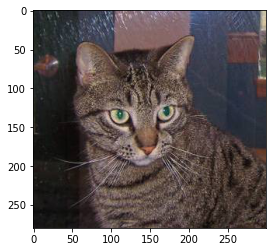

In [9]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(train_images_path+'driveCats'+'/cat.1.jpg'))

In [10]:
from tensorflow.keras.preprocessing import image
def get_status(path):
    img = image.load_img(path,target_size=image_shape)
    arrImg = image.img_to_array(img)
    reshapedArr = np.reshape(arrImg,(1,100,100,3))
    prediction = model.predict(reshapedArr)
    return prediction


In [11]:
get_status(train_images_path+'driveCats'+'/cat.1.jpg')

array([[0.]], dtype=float32)

In [12]:
train_images_path+'driveDogs'+'/dog.1.jpg'

'/content/gdrive/My Drive/train/driveDogs/dog.1.jpg'

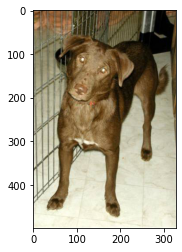

In [13]:
plt.imshow(imread("/content/gdrive/My Drive/train/driveDogs/dog.1.jpg"))

In [14]:
get_status('/content/gdrive/My Drive/train/driveDogs/dog.1.jpg') #Regresó 1, está correcto porque es un perro.

array([[0.]], dtype=float32)

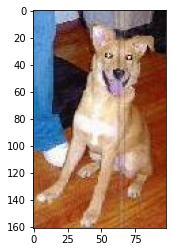

In [15]:
plt.imshow(imread('/content/gdrive/My Drive/train/driveDogs/dog.12.jpg'))

In [16]:
get_status('/content/gdrive/My Drive/train/driveDogs/dog.12.jpg')

array([[0.]], dtype=float32)

In [19]:
def get_label(number):
  if number == 0:
    return 'perro'
  elif number == 1:
    return 'gato'

In [26]:
wero = '/content/gdrive/My Drive/wero.jpg'

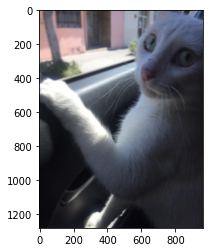

In [27]:
plt.imshow(imread(wero))

In [28]:
get_label(get_status(wero))

'gato'